In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os


import warnings
warnings.filterwarnings("ignore")


In [ ]:


crime_data = pd.read_csv("Crimes_2001_to_Present.csv")

crime_data_clean = crime_data.dropna(subset=['Location', 'Longitude', 'Latitude'])

crime_data_clean.to_csv("Cleaned_Crimes_2001_to_2024.csv", index=False)

crime_data_clean.head()

In [ ]:
zillow_data = pd.read_csv("Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv")


chicago_zips = [
    '60601', '60602', '60603', '60604', '60605', '60606', '60607', '60608', '60609', '60610',
    '60611', '60612', '60613', '60614', '60615', '60616', '60618', '60619', '60620', '60621',
    '60622', '60623', '60624', '60625', '60626', '60628', '60629', '60630', '60631', '60632',
    '60633', '60634', '60636', '60637', '60638', '60639', '60640', '60641', '60642', '60643',
    '60644', '60645', '60646', '60647', '60649', '60651', '60652', '60653', '60654', '60655',
    '60656', '60657', '60659', '60660', '60661'
]


chicago_house_data = zillow_data[zillow_data['RegionName'].astype(str).isin(chicago_zips)]
chicago_house_data.to_csv("chicago_house_data.csv", index=False)

chicago_house_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
11,84630,12,60629,zip,IL,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,94257.291058,...,234004.723598,233668.496865,234299.789352,236259.321624,239436.038763,242075.582454,244552.817520,246181.352082,247934.938513,249142.517165
32,84620,33,60618,zip,IL,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,210218.916228,...,497591.067833,495962.622784,496206.043645,499013.801788,501876.903324,502798.167127,501560.414473,500298.084312,500038.914621,501265.740523
40,84639,41,60639,zip,IL,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,94127.651156,...,285537.958773,285213.779631,286467.018365,289624.300926,293397.446549,296106.408668,298015.540670,299325.340949,300584.980439,301388.109266
56,84646,58,60647,zip,IL,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,203345.332982,...,496412.046523,495256.803275,495466.343516,497600.129843,499341.765319,499234.877071,497433.344382,496075.906462,495696.399951,495881.478933
72,84633,74,60632,zip,IL,IL,Chicago,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,104706.461531,...,250784.181132,251060.344124,252109.335317,254140.726021,257270.544938,259702.553122,261953.203033,263528.110435,265281.906590,266416.717240


In [ ]:
crime_points = gpd.GeoDataFrame(crime_data_clean, geometry=gpd.points_from_xy(crime_data_clean.Longitude, crime_data_clean.Latitude), crs="EPSG:4326")

zipcode_boundaries = gpd.read_file("zipcodeshapefile/zipcode/tl_2022_us_zcta520.shp")
zipcode_boundaries = zipcode_boundaries.to_crs(crime_points.crs)

crime_with_zipcode = gpd.sjoin(crime_points, zipcode_boundaries, how="inner", predicate="within")
crime_with_zipcode_df = pd.DataFrame(crime_with_zipcode.drop(columns='geometry'))
crime_with_zipcode_df.to_csv("Crimes_with_Zipcodes.csv", index=False)

crime_with_zipcode_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,index_right,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20
1,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,30642,60639,60639,B5,G6350,S,12852713,0,+41.9205977,-087.7559420
2,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,30319,60659,60659,B5,G6350,S,6111522,2818,+41.9895781,-087.7065715
3,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,30072,60613,60613,B5,G6350,S,6029747,1518475,+41.9561527,-087.6529937
4,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,31258,60619,60619,B5,G6350,S,15859292,0,+41.7434386,-087.6053181
6,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,30362,60606,60606,B5,G6350,S,601045,101557,+41.8812592,-087.6374518


In [ ]:
crime_with_zipcode_df['Date'] = pd.to_datetime(crime_with_zipcode_df['Date'])
crime_with_zipcode_df['Year'] = crime_with_zipcode_df['Date'].dt.year
crime_with_zipcode_df['Month'] = crime_with_zipcode_df['Date'].dt.month

crime_summary = crime_with_zipcode_df.groupby(['Year', 'Month', 'ZCTA5CE20']).agg(
    crime_count=('ID', 'size'),
    arrest_count=('Arrest', 'sum'),
    domestic_count=('Domestic', 'sum')
).reset_index()

crime_summary.to_csv("Crime_Summary_by_Zipcode_and_Month.csv", index=False)



In [12]:
crime_summary.head()

,Year,Month,ZCTA5CE20,crime_count,arrest_count,domestic_count
0,2001,1,60018,152,59,3
1,2001,1,60202,1,1,0
2,2001,1,60601,289,132,18
3,2001,1,60602,204,100,15
4,2001,1,60603,104,35,4


In [ ]:
non_date_columns = ['RegionName', 'RegionID', 'City', 'CountyName', 'Metro', 'StateName', 'State', 'SizeRank', 'RegionType']
date_columns = [col for col in chicago_house_data.columns if col not in non_date_columns]

house_data_long = pd.melt(
    chicago_house_data,
    id_vars=['RegionName', 'RegionID', 'City', 'CountyName'],
    value_vars=date_columns,  
    var_name='date',
    value_name='price'
)

house_data_long['date'] = pd.to_datetime(house_data_long['date'], errors='coerce')
house_data_long['Year'] = house_data_long['date'].dt.year
house_data_long['Month'] = house_data_long['date'].dt.month

house_data_long = house_data_long[['RegionName', 'RegionID', 'City', 'CountyName', 'Year', 'Month', 'price']]

print(house_data_long)


house_data_long.to_csv("House_Price_Long_Format.csv", index=False)

       RegionName  RegionID     City   CountyName  Year  Month          price
0           60629     84630  Chicago  Cook County  2000      1   94257.291058
1           60618     84620  Chicago  Cook County  2000      1  210218.916228
2           60639     84639  Chicago  Cook County  2000      1   94127.651156
3           60647     84646  Chicago  Cook County  2000      1  203345.332982
4           60632     84633  Chicago  Cook County  2000      1  104706.461531
...           ...       ...      ...          ...   ...    ...            ...
16330       60661     84657  Chicago  Cook County  2024      9  296429.902468
16331       60606     84608  Chicago  Cook County  2024      9  266590.669588
16332       60602     84604  Chicago  Cook County  2024      9  250830.835016
16333       60603     84605  Chicago  Cook County  2024      9  275256.391061
16334       60604     84606  Chicago  Cook County  2024      9  254476.160150

[16335 rows x 7 columns]


In [ ]:
house_data_long['Year'] = house_data_long['Year'].astype(int)
house_data_long['Month'] = house_data_long['Month'].astype(int)
crime_summary['Year'] = crime_summary['Year'].astype(int)
crime_summary['Month'] = crime_summary['Month'].astype(int)

house_data_long['RegionName'] = house_data_long['RegionName'].astype(str)
crime_summary['ZCTA5CE20'] = crime_summary['ZCTA5CE20'].astype(str)

combined_data = house_data_long.rename(columns={'RegionName': 'ZCTA5CE20'}).merge(
    crime_summary, on=['ZCTA5CE20', 'Year', 'Month'], how='left'
)

combined_data.to_csv("Combined_Housing_Crime_Data.csv", index=False)

combined_data[['crime_count', 'arrest_count', 'domestic_count']] = combined_data[['crime_count', 'arrest_count', 'domestic_count']].fillna(0)

print(combined_data.head())



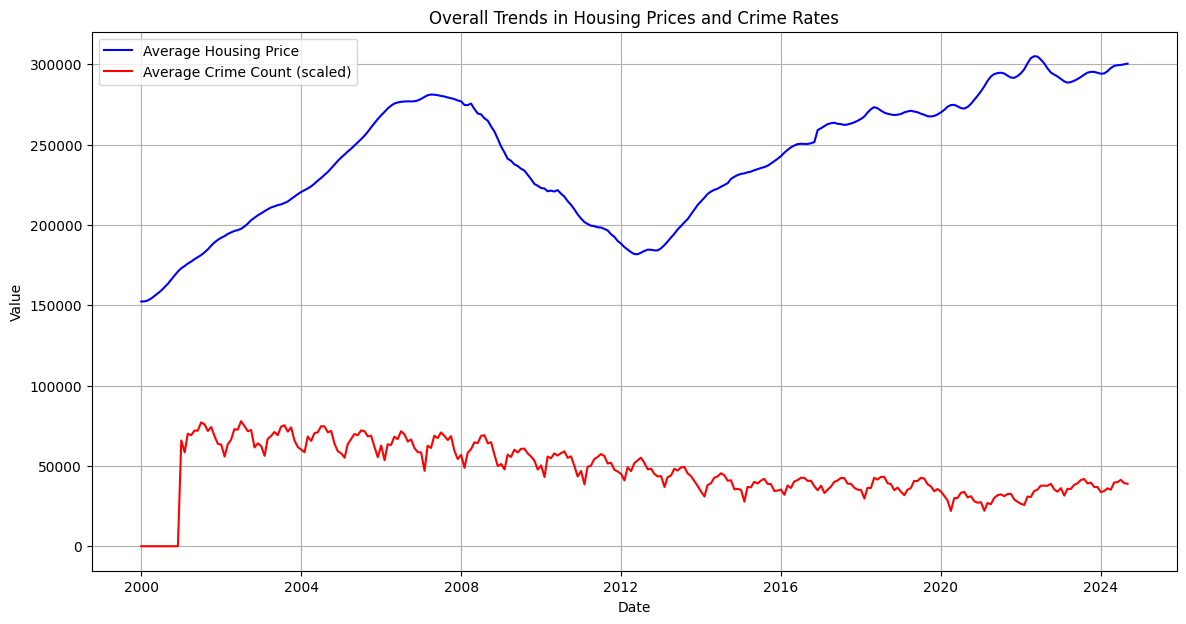

In [ ]:
overall_trends = combined_data.groupby(['Year', 'Month']).agg(
    avg_price=('price', 'mean'),
    avg_crime_count=('crime_count', 'mean')
).reset_index()
overall_trends['Date'] = pd.to_datetime(overall_trends[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(14, 7))
plt.plot(overall_trends['Date'], overall_trends['avg_price'], label="Average Housing Price", color="blue")
plt.plot(overall_trends['Date'], overall_trends['avg_crime_count'] * 100, label="Average Crime Count (scaled)", color="red")
plt.title("Overall Trends in Housing Prices and Crime Rates")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


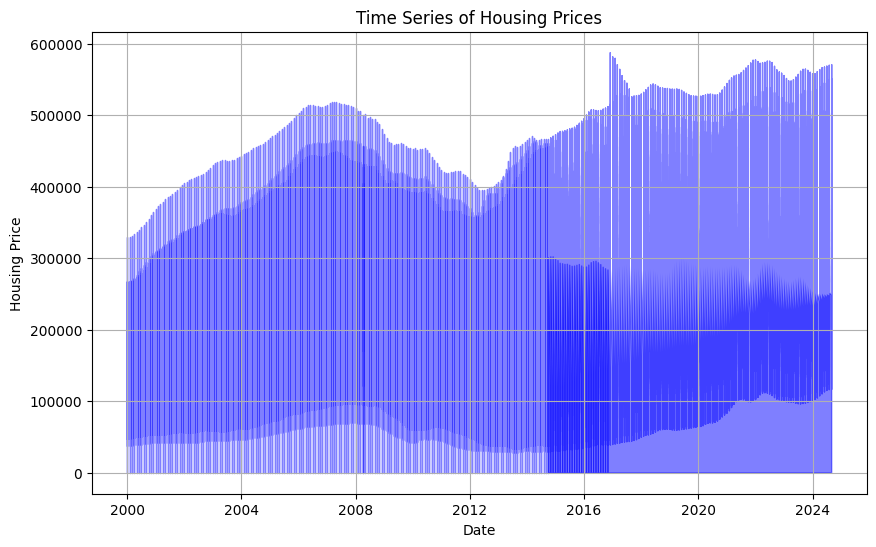

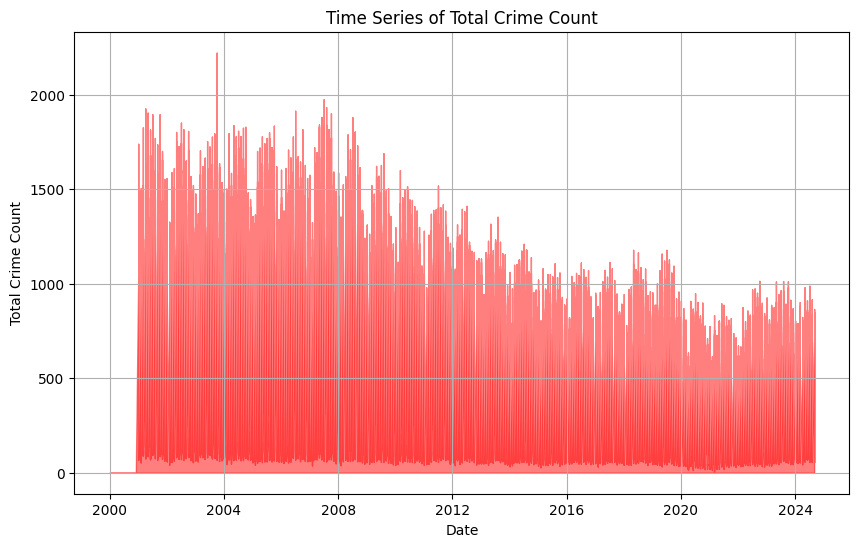

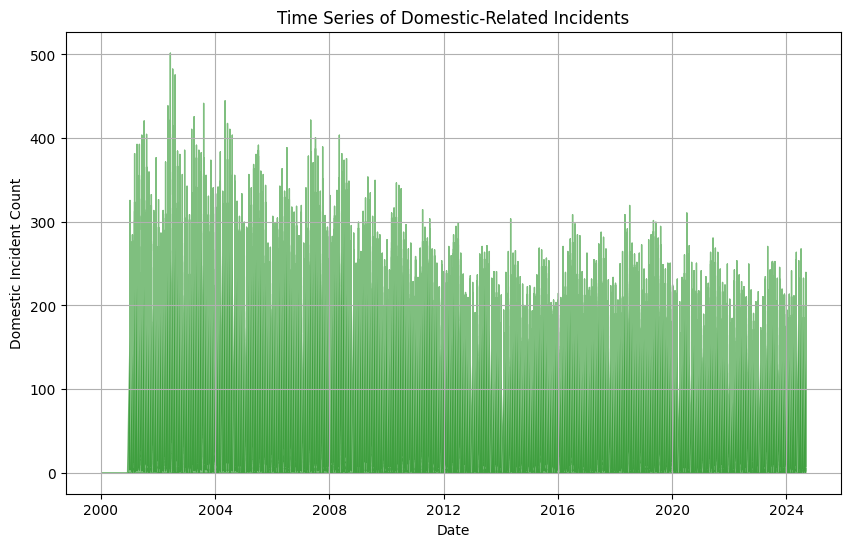

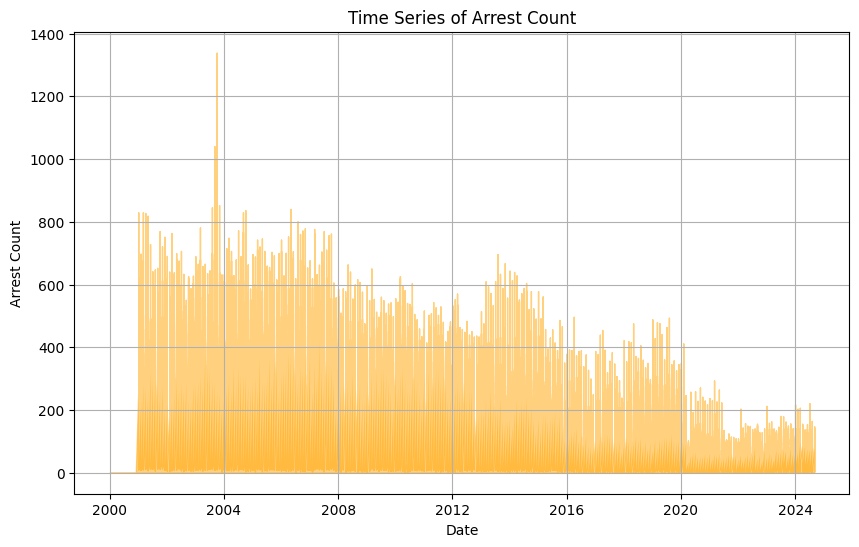

In [ ]:
combined_data['Date'] = pd.to_datetime(combined_data[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(10, 6))
plt.fill_between(combined_data['Date'], combined_data['price'], color='blue', alpha=0.5)
plt.title("Time Series of Housing Prices")
plt.xlabel("Date")
plt.ylabel("Housing Price")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.fill_between(combined_data['Date'], combined_data['crime_count'], color='red', alpha=0.5)
plt.title("Time Series of Total Crime Count")
plt.xlabel("Date")
plt.ylabel("Total Crime Count")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.fill_between(combined_data['Date'], combined_data['domestic_count'], color='green', alpha=0.5)
plt.title("Time Series of Domestic-Related Incidents")
plt.xlabel("Date")
plt.ylabel("Domestic Incident Count")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.fill_between(combined_data['Date'], combined_data['arrest_count'], color='orange', alpha=0.5)
plt.title("Time Series of Arrest Count")
plt.xlabel("Date")
plt.ylabel("Arrest Count")
plt.grid(True)
plt.show()


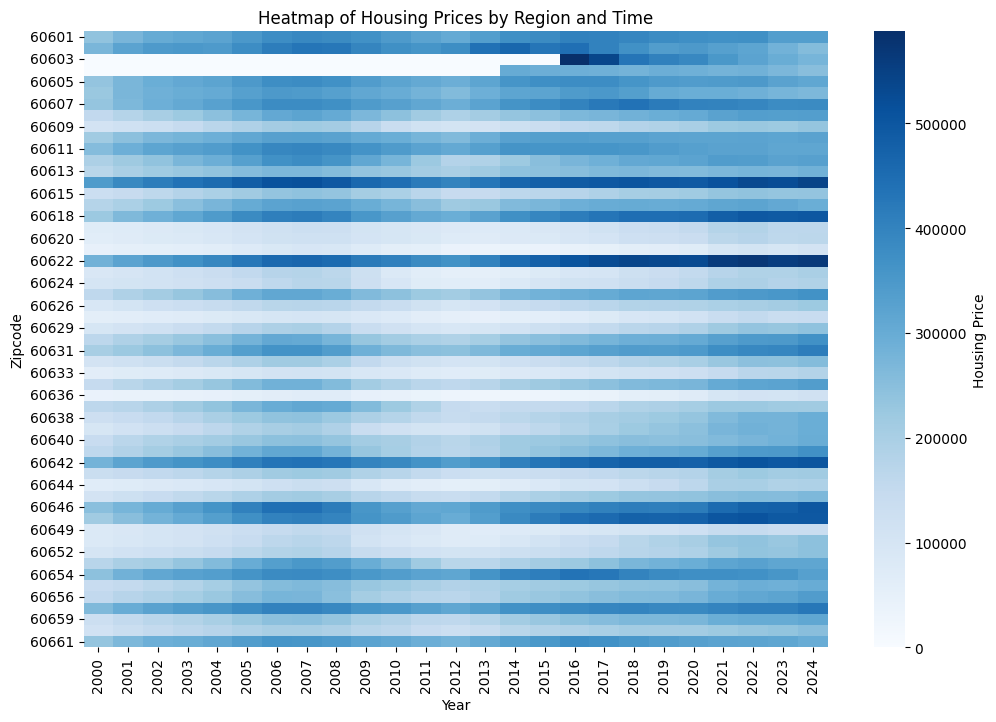

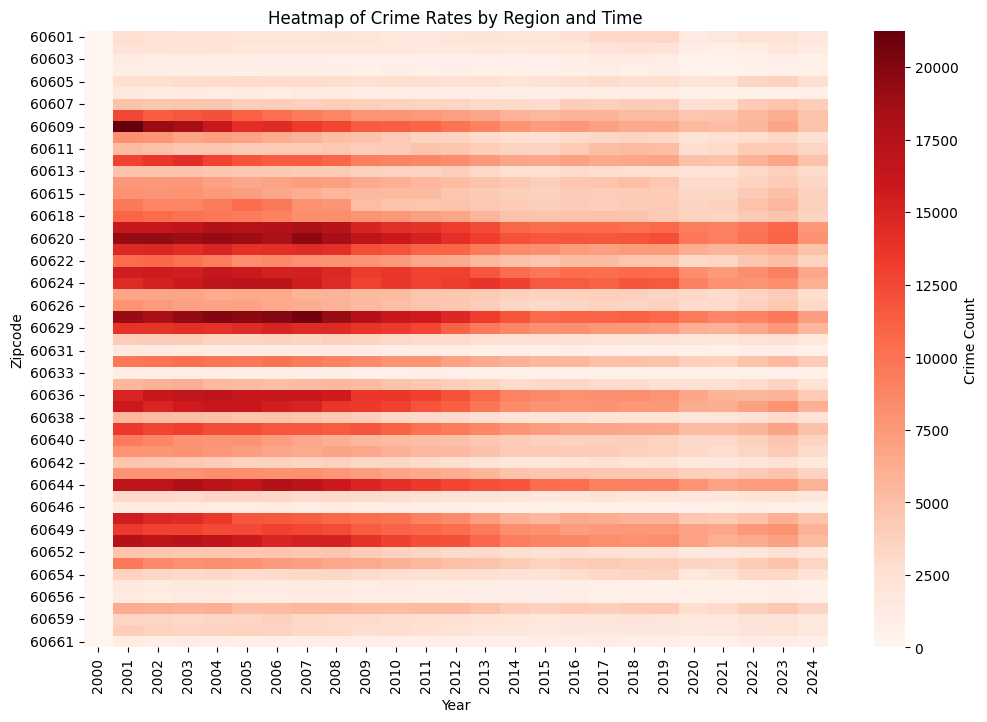

In [ ]:
house_price_pivot_data = combined_data.groupby(['ZCTA5CE20', 'Year']).agg({'price': 'mean'}).reset_index()
house_price_pivot = house_price_pivot_data.pivot(index="ZCTA5CE20", columns="Year", values="price")

crime_count_pivot_data = combined_data.groupby(['ZCTA5CE20', 'Year']).agg({'crime_count': 'sum'}).reset_index()
crime_count_pivot = crime_count_pivot_data.pivot(index="ZCTA5CE20", columns="Year", values="crime_count")

house_price_pivot = house_price_pivot.fillna(0).astype(float)
crime_count_pivot = crime_count_pivot.fillna(0).astype(float)

plt.figure(figsize=(12, 8))
sns.heatmap(house_price_pivot, cmap="Blues", cbar_kws={'label': 'Housing Price'})
plt.title("Heatmap of Housing Prices by Region and Time")
plt.xlabel("Year")
plt.ylabel("Zipcode")
plt.show()


plt.figure(figsize=(12, 8))
sns.heatmap(crime_count_pivot, cmap="Reds", cbar_kws={'label': 'Crime Count'})
plt.title("Heatmap of Crime Rates by Region and Time")
plt.xlabel("Year")
plt.ylabel("Zipcode")
plt.show()